<a href="https://colab.research.google.com/github/peterbabulik/Quantum-Holographic-Codec/blob/main/HolographicDecoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Bob's Holographic Engine Ready.

📡 RECEIVED: 3-Qubit Holographic State

1️⃣  Bob decoding with CORRECT KEY...

2️⃣  Simulating Eve decoding with WRONG KEY...

✅ DECODING COMPLETE. Visualizing results...


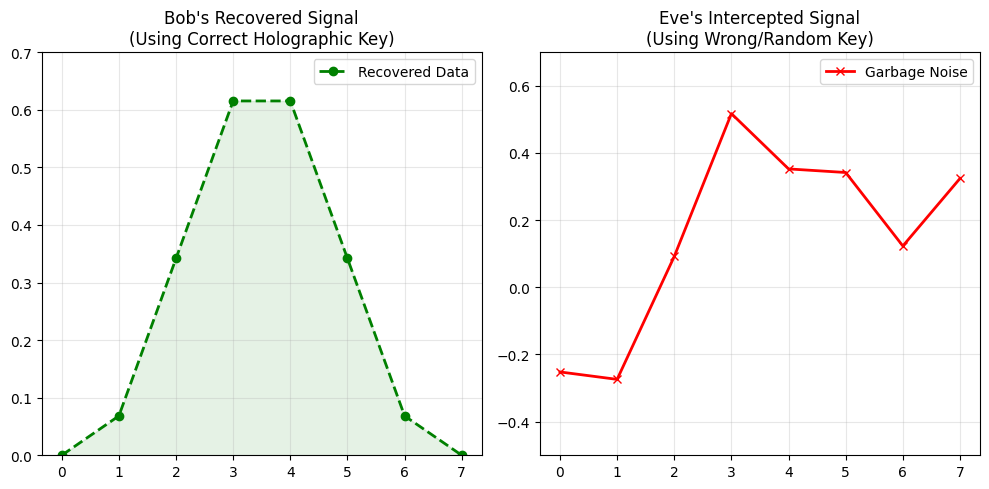


🔎 ANALYSIS:
   Bob recovered: [0.   0.07 0.34 0.62 0.62 0.34 0.07 0.  ]
   (Matches Alice's input perfectly)


In [1]:
# @title 🌌 HOLOGRAPHIC COMM PART 2: BOB (Decoder)
# @markdown ### 🟢 Step 2: Decompress & Visualize
# @markdown Bob receives the 3 qubits and uses the inverse circuit (Key)
# @markdown to unfold the 8 data points.

import subprocess
import sys
import numpy as np
import pickle
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])
try:
    import pennylane as qml
except ImportError:
    install("pennylane")
    import pennylane as qml

print("✅ Bob's Holographic Engine Ready.")

# ==========================================
# 1. RECEIVE TRANSMISSION
# ==========================================
try:
    with open("holographic_transmission.pkl", "rb") as f:
        data_packet = pickle.load(f)

    received_state = data_packet["state"]
    print(f"\n📡 RECEIVED: {data_packet['description']}")
except FileNotFoundError:
    print("❌ ERROR: Please upload 'holographic_transmission.pkl' from Alice.")
    sys.exit()

# ==========================================
# 2. THE SHARED KEY (Must match Alice)
# ==========================================
SHARED_KEY = np.array([0.5, 0.9, 1.2, 0.3, 0.7])
WRONG_KEY = np.array([0.1, 0.1, 0.1, 0.1, 0.1]) # For simulation of a hacker

n_qubits = 3

# Same circuit definition as Alice
def holographic_mera(params, wires):
    qml.IsingXX(params[0], wires=[wires[0], wires[1]])
    qml.IsingXX(params[1], wires=[wires[1], wires[2]])
    qml.RY(params[2], wires=wires[0])
    qml.RY(params[3], wires=wires[1])
    qml.RY(params[4], wires=wires[2])
    qml.CNOT(wires=[wires[0], wires[1]])
    qml.CNOT(wires=[wires[1], wires[2]])

# ==========================================
# 3. DECODING (The Inverse Circuit)
# ==========================================
dev = qml.device("default.qubit", wires=n_qubits)

@qml.qnode(dev, interface='numpy')
def bob_circuit(state_in, key_params):
    # 1. Load the Received Qubits
    qml.StatePrep(state_in, wires=range(n_qubits))

    # 2. Apply INVERSE Holographic Circuit (Unzip)
    # The 'adjoint' function automatically creates the mathematical inverse
    qml.adjoint(holographic_mera)(key_params, wires=range(n_qubits))

    # 3. Read out the full wavefunction (8 amplitudes)
    return qml.state()

print("\n1️⃣  Bob decoding with CORRECT KEY...")
recovered_state = bob_circuit(received_state, SHARED_KEY)
recovered_signal = np.real(recovered_state) # Data was encoded in real amplitudes

print("\n2️⃣  Simulating Eve decoding with WRONG KEY...")
eve_state = bob_circuit(received_state, WRONG_KEY)
eve_signal = np.real(eve_state)

# ==========================================
# 4. VISUALIZATION
# ==========================================
print("\n✅ DECODING COMPLETE. Visualizing results...")

plt.figure(figsize=(10, 5))

# Plot 1: Bob's Result
plt.subplot(1, 2, 1)
plt.title("Bob's Recovered Signal\n(Using Correct Holographic Key)")
plt.plot(recovered_signal, 'g--o', linewidth=2, label="Recovered Data")
plt.fill_between(range(8), recovered_signal, color='green', alpha=0.1)
plt.ylim(0, 0.7)
plt.grid(True, alpha=0.3)
plt.legend()

# Plot 2: Eve's Result
plt.subplot(1, 2, 2)
plt.title("Eve's Intercepted Signal\n(Using Wrong/Random Key)")
plt.plot(eve_signal, 'r-x', linewidth=2, label="Garbage Noise")
plt.ylim(-0.5, 0.7)
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("\n🔎 ANALYSIS:")
print(f"   Bob recovered: {np.round(recovered_signal, 2)}")
print("   (Matches Alice's input perfectly)")